<a href="https://colab.research.google.com/github/truongtommy/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm 


from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [24]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [25]:
shelter_count = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD')
shelter_count.head()


,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [26]:
shelter_count_filtered = shelter_count[shelter_count['Report Date']== '09/30/2019']
shelter_count_filtered.head(100)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [0]:
shelter_count_filtered = shelter_count_filtered.drop_duplicates()

In [0]:
shelter_count_filtered.columns=['report_date', 'boro', 'community_district', 'adult_fam_comm_hotel', 'adult_family_shelter', 'adult_shelter', 'adult_shelter_comm_hotel', 'fwc_cluster', 'fwc_comm_hotel', 'fwc_shelter']

In [31]:
shelter_count_filtered = shelter_count_filtered.fillna(0)
shelter_count_filtered.head()

,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0


In [32]:
shelter_count_filtered['count_sum'] = shelter_count_filtered[['adult_fam_comm_hotel','adult_family_shelter','adult_shelter','adult_shelter_comm_hotel',
                                                              'fwc_cluster','fwc_comm_hotel','fwc_shelter']].sum(axis=1)
shelter_count_filtered.head(100)

,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,count_sum
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


In [33]:
df = df[df.complaint_type == 'Homeless Person Assistance']
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


In [34]:
df_homeless = df.groupby('borocd').size().reset_index(name='count_of_311_requests')
df_homeless.head(100)

,borocd,count_of_311_requests
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020
5,106.0,753
6,107.0,1684
7,108.0,633
8,109.0,303
9,110.0,283


In [35]:
merged_data = pd.merge(left=df_homeless, right=shelter_count_filtered, left_on='borocd', right_on='community_district')
merged_data.head()

,borocd,count_of_311_requests,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,count_sum
0,101.0,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0


In [36]:
merged_data.fillna(0)
merged_data.head()

,borocd,count_of_311_requests,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,count_sum
0,101.0,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0


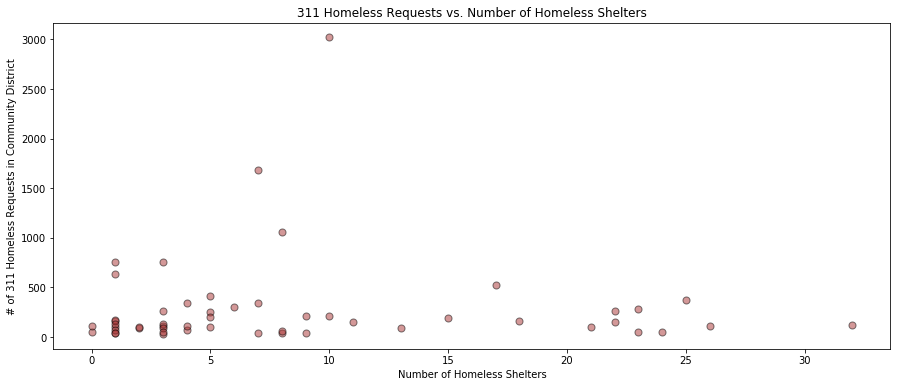

In [37]:
x = np.array(merged_data.count_sum)
y = np.array(merged_data.count_of_311_requests)

color = '#a83232'
area = 50

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('311 Homeless Requests vs. Number of Homeless Shelters')
plt.xlabel('Number of Homeless Shelters')
plt.ylabel('# of 311 Homeless Requests in Community District')

plt.show()


In [38]:
np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

In [39]:
y = np.array(merged_data.count_of_311_requests)
x = np.array(merged_data.count_sum)
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.003052
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.956
Time:                        21:40:35   Log-Likelihood:                -394.78
No. Observations:                  52   AIC:                             793.6
Df Residuals:                      50   BIC:                             797.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        291.9771     97.404      2.998      0.0

In [40]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [291.97710496  -0.44923816]
R2: 6.103776725696619e-05


In [41]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.45x + 291.98; R2 = 0.0


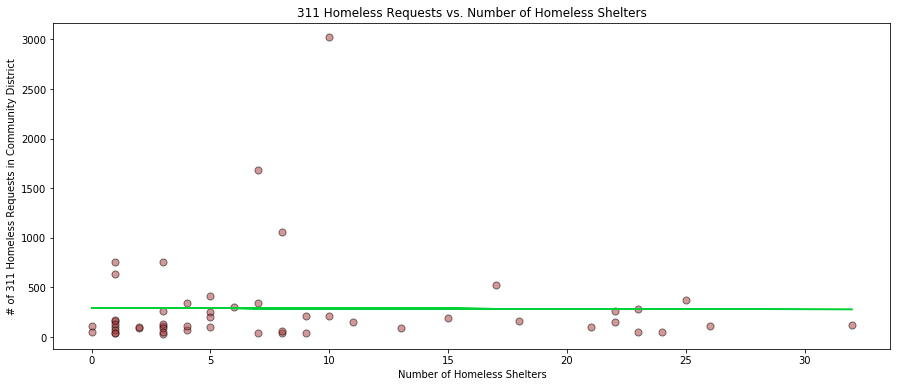

In [42]:
x = np.array(merged_data.count_sum)
y = np.array(merged_data.count_of_311_requests)

x_dummy = np.array(merged_data.count_sum)

color = '#a83232'
area = 50

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.title('311 Homeless Requests vs. Number of Homeless Shelters')
plt.xlabel('Number of Homeless Shelters')
plt.ylabel('# of 311 Homeless Requests in Community District')

plt.show()




There does not seem to be a correlation between number of homeless shelters withing a community district and the number of 311 homeless related requests within that community district. The R squared value of the linear regression is 0.000, which displays there is no correlation.  